<a href="https://colab.research.google.com/github/priyavratamohan/Financial-Forecasting-ML-Model/blob/main/financial_forecasting_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed
set_seed(455)
np.random.seed(455)

In [5]:
dataset = pd.read_csv("/content/Mastercard_stock_history.csv", index_col = "Date", parse_dates=["Date"]).drop(["Dividends", "Stock Splits"], axis =1)
print(dataset.head())

                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000


In [6]:
dataset.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [7]:
tstart = 2016
tend = 2020

In [8]:
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}","High"].plot(figsize =(16,4), legend = True)
    dataset.loc[f"{tend+1}":,"High"].plot(figsize = (16,4), legend=True)

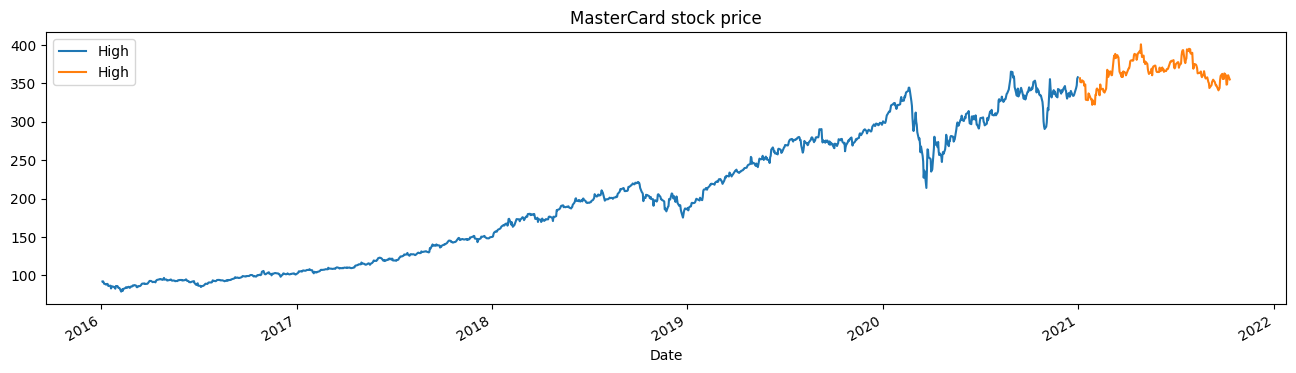

In [10]:
plt.legend([f"Train(Before{tend+1})",f"Test({tend+1} and beyond)"])
plt.title("MasterCard stock price")
train_test_plot(dataset, tstart, tend)
plt.show()

In [11]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}","High"].values
    test = dataset.loc[f"{tend+1}":,"High"].values
    return train, test

In [12]:
training_set , test_set = train_test_split(dataset, tstart, tend)

In [13]:
sc = MinMaxScaler(feature_range = (0,1))
training_set = training_set.reshape(-1,1)
training_set_scaled= sc.fit_transform(training_set)

In [14]:
def split_sequence(sequence, n_steps):
    X, y =list(), list()
    for i in range(len(sequence)):
        end_ix = i+n_steps
        if end_ix > len(sequence)-1:
            break

        seq_x, seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [15]:
n_steps = 60
features = 1

X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],features)

In [17]:
#the LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units = 125, activation= "tanh", input_shape = (n_steps, features)))
model_lstm.add(Dense(units =1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
#compiling the model
model_lstm.compile(optimizer = "RMSprop", loss = "mse")

model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 125)                 │          63,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             126 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0317
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0020
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0020
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0013
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0014
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0010
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 8.7737e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 7.9588e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 7.2929e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 7.3136e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 7.5511e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 7.0197e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 6.6568e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 6.2823e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 

In [20]:
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total)-len(test_set)- n_steps:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [21]:
X_test, y_test = split_sequence(inputs, n_steps)

In [23]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],features)

In [24]:
predicted_stock_price = model_lstm.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


In [25]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [26]:
def plot_predictions(test, predicted):
    plt.plot(test,color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()

In [27]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

In [32]:
return_rmse(test_set, predicted_stock_price)

The root mean squared error is 7.62.


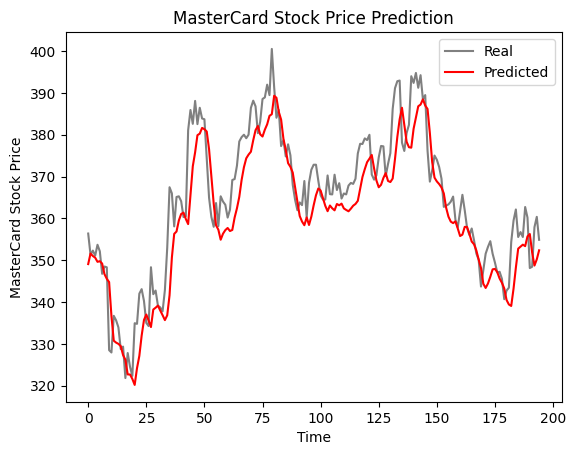

In [28]:
plot_predictions(test_set, predicted_stock_price)

In [29]:
def return_mae(test, predicted):
    mae = mean_absolute_error(test, predicted)
    print("The mean absolute error is {:.2f}.".format(mae))

In [31]:
return_mae(test_set, predicted_stock_price)

The mean absolute error is 5.94.


In [33]:
def return_mape(test, predicted):
    mape = np.mean(np.abs((test - predicted) / test)) * 100
    print("The mean absolute percentage error is {:.2f}%.".format(mape))

return_mape(test_set, predicted_stock_price)

The mean absolute percentage error is 5.24%.


In [36]:
def return_r2(test, predicted):
    r2 = r2_score(test, predicted)
    print(f"The R-squared value is {r2:.4f}.")

return_r2(test_set, predicted_stock_price)

The R-squared value is 0.7960.


In [39]:
def return_max_error(test, predicted):
    max_err = max_error(test, predicted)
    print(f"The maximum error is {max_err:.2f}.")

return_max_error(test_set, predicted_stock_price)

The maximum error is 25.83.


In [40]:
def return_mbd(test, predicted):
    mbd = np.mean(predicted - test)
    print(f"The mean bias deviation is {mbd:.4f}.")

return_mbd(test_set, predicted_stock_price)

The mean bias deviation is -4.2580.
